# CutSky OutPut

In this notebook, we show the output of `cutsky`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.loadtxt('/pscratch/sd/s/siyizhao/fihobi/lc_test/NGC.dat')

In [3]:
ra = data[:,0]
dec = data[:,1]
z_obs = data[:,2]
z_cosmo = data[:,3]
nz = data[:,4]
status = data[:,5]
ran_num = data[:,6]

## random number

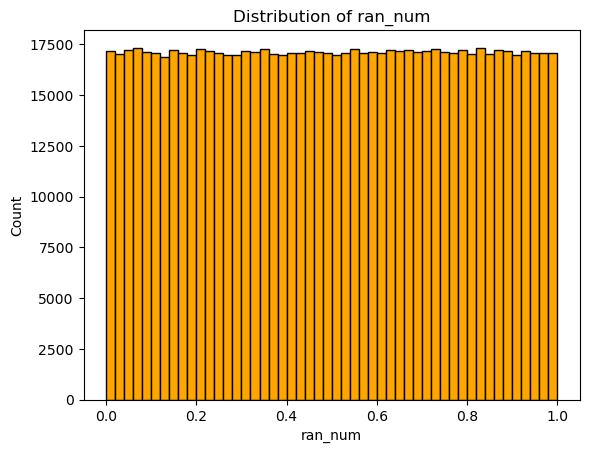

In [4]:
plt.hist(ran_num, bins=50, color='orange', edgecolor='black')
plt.xlabel('ran_num')
plt.ylabel('Count')
plt.title('Distribution of ran_num')
plt.show()

## status

- `STATUS`: *(Optional)* Bitmask for extra selections: `1` = within an extra footprint; `2` = kept in radial selection 

In our case, we do not have extra footprint mask, so the `status` have only 2 cases: `2`=kept in radial selection, `0`=not kept in radial selection.

In [5]:
np.unique(status)

array([0., 2.])

## n(z)

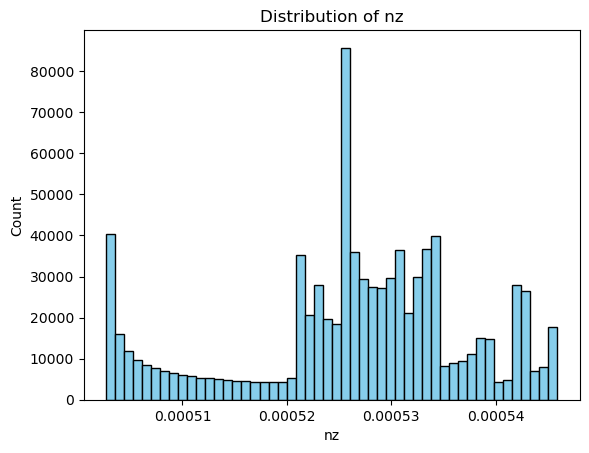

In [6]:
plt.hist(nz, bins=50, color='skyblue', edgecolor='black')
plt.xlabel('nz')
plt.ylabel('Count')
plt.title('Distribution of nz')
plt.show()

## redshift

In [7]:
sky_area_deg2 = 4 * np.pi * (180/np.pi)**2
print(f"全天面积约为 {sky_area_deg2:.2f} 平方度")

全天面积约为 41252.96 平方度


In [8]:
from scipy.integrate import quad

# Cosmological parameters (example values for DESI(), modify as needed)
c = 299792.458  # speed of light in km/s
Om0 = 0.315192
Ode0 = 0.684808

def E(z):
    return np.sqrt(Om0 * (1 + z)**3 + Ode0)

def comoving_distance(z):
    integral, _ = quad(lambda x: 1.0 / E(x), 0, z)
    return (c / 100) * integral  # in cMpc/h

def angular_diameter_distance(z):
    return comoving_distance(z) / (1 + z)

In [9]:
# nz_ref = np.loadtxt('/global/cfs/cdirs/desi/survey/catalogs/DA2/LSS/loa-v1/LSScats/v1.1/PIP/LRG_NGC_nz.txt')
nz_ref = np.loadtxt('/global/cfs/cdirs/desi/survey/catalogs/DA2/LSS/loa-v1/LSScats/v2/PIP/LRG_NGC_nz.txt')
area = 6612.2136 #deg^2
zmid = nz_ref[:,0]
zlow = nz_ref[:,1]
zhigh = nz_ref[:,2]
N_ref = np.zeros(len(zmid))
for i in range(len(zmid)):
    V_zbin = area/3 * (np.pi/180)**2 * ( angular_diameter_distance(zhigh[i])**3 - angular_diameter_distance(zlow[i])**3 ) # (Mpc/h)^3
    N_ref[i] = nz_ref[i,3] * V_zbin

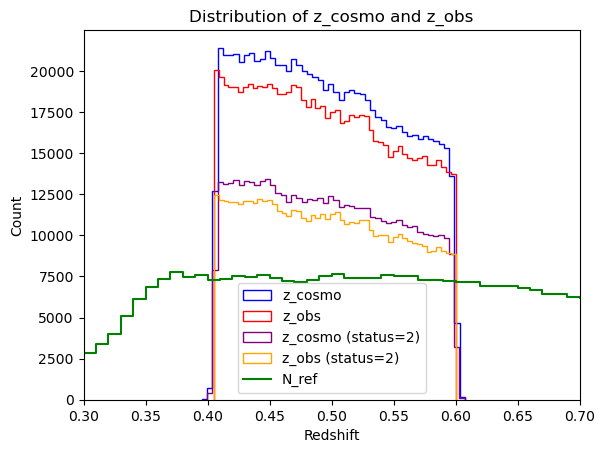

In [10]:
plt.hist(z_cosmo, bins=50, histtype='step', label='z_cosmo', color='blue')
plt.hist(z_obs, bins=50, histtype='step', label='z_obs', color='red')
plt.hist(z_cosmo[status == 2], bins=50, histtype='step', label='z_cosmo (status=2)', color='purple')
plt.hist(z_obs[status == 2], bins=50, histtype='step', label='z_obs (status=2)', color='orange')
plt.plot(zmid, N_ref, drawstyle='steps-mid', label='N_ref', color='green')
plt.xlim(0.3, 0.7)
plt.xlabel('Redshift')
plt.ylabel('Count')
plt.title('Distribution of z_cosmo and z_obs')
plt.legend()
plt.show()

- [ ] Why z_obs (status=2) is not same as N_ref?

## RA, DEC

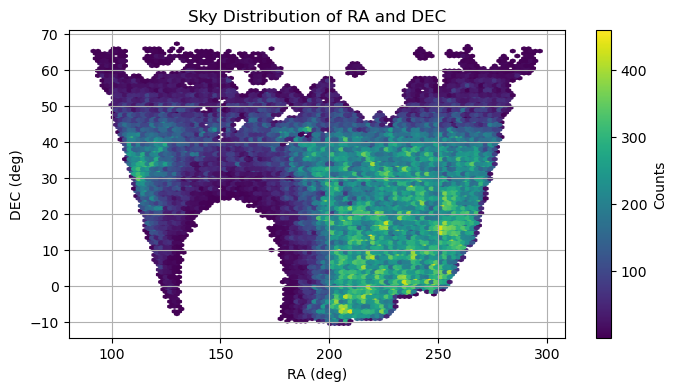

In [11]:
plt.figure(figsize=(8, 4))
plt.xlabel('RA (deg)')
plt.ylabel('DEC (deg)')
plt.hexbin(ra, dec, gridsize=100, cmap='viridis', mincnt=1)
cb = plt.colorbar(label='Counts')
plt.title('Sky Distribution of RA and DEC')
plt.grid(True)
plt.show()

In [12]:
# 计算每个z_cosmo的comoving distance
comov_dist = np.array([comoving_distance(z) for z in z_cosmo])

# 显示一些基本信息
print(f"共动距离范围: {comov_dist.min():.2f} - {comov_dist.max():.2f} Mpc/h")
print(f"对应红移范围: {z_cosmo.min():.3f} - {z_cosmo.max():.3f}")

# 查看 status == 2 的情况
z_obs_kept = z_obs[status == 2]
print(f"\nstatus == 2 的星系数量: {len(z_obs_kept)}")
print(f"status == 2 的 z_obs 范围: {z_obs_kept.min():.3f} - {z_obs_kept.max():.3f}")
print(f"总星系数量: {len(z_obs)}")
print(f"保留比例: {len(z_obs_kept)/len(z_obs)*100:.1f}%")

共动距离范围: 1069.98 - 1550.93 Mpc/h
对应红移范围: 0.395 - 0.607

status == 2 的星系数量: 540635
status == 2 的 z_obs 范围: 0.405 - 0.600
总星系数量: 855935
保留比例: 63.2%
